In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
# Read in cnn test size data
with open('CNN-accuracy-new.pkl', 'rb') as f:
    cnn_test_size = pickle.load(f)
cnn_test_size = pd.DataFrame(cnn_test_size) 
cnn_test_size.head()

,1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1
0,78.444322,77.985691,76.976702,75.160521,73.362686,74.610163,71.363053,72.188589,69.858742,69.01486


In [3]:
# Read in cnn test size data
with open('DNN-accuracy-new.pickle', 'rb') as f:
    dnn_test_size = pickle.load(f)
dnn_test_size = pd.DataFrame(dnn_test_size)
# return max accuracy for each test size
dnn_test_size = dnn_test_size.max(axis=0)
dnn_test_size.head()

1.0    72.172278
0.9    72.516283
0.8    72.745620
0.7    70.901752
0.6    70.869645
dtype: float64

In [4]:
# read in decision tree test size data
with open('decision-tree-accuracy-new.pickle', 'rb') as f:
    dt_test_size = pickle.load(f)
dt_test_size = pd.DataFrame(dt_test_size) * 100
dt_test_size.head()

,1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1
0,68.299395,67.675656,67.198679,67.437167,68.170978,66.171345,67.528894,68.556228,66.409833,65.914511


In [5]:
# read in muygps test sizes
with open('muygps-accuracy-new.pkl', 'rb') as f:
    muygps_test_size = pickle.load(f)
muygps_test_size = pd.DataFrame(muygps_test_size)
muygps_test_size.head()

,1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1
0,83.691,82.48,81.013,79.527,78.077,76.61,75.913,75.087,72.849,71.051


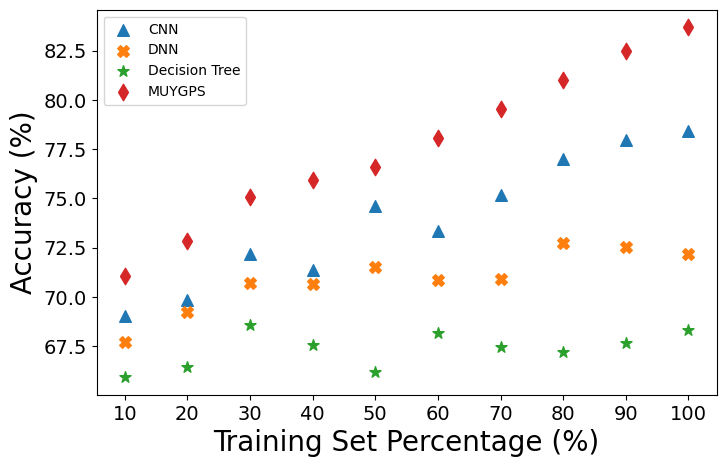

In [8]:
# list plt markers
# markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', 'D', 'd']
markers = ['^', 'X','*','d']

train_sizes = [100, 90, 80, 70, 60, 50, 40, 30, 20, 10]
models = [cnn_test_size, dnn_test_size, dt_test_size, muygps_test_size]
labels = ['CNN', 'DNN', 'Decision Tree', 'MUYGPS']
# plot all test sizes results
plt.figure(figsize=(8, 5))
for i,model in enumerate(models):
    plt.scatter(train_sizes, model, marker=markers[i], label=labels[i], s=70)
# display all x points
plt.xticks(train_sizes)
# increase axes titles and label font sizes
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.xlabel('Training Set Percentage (%)')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.savefig('limited-data-accuracy.png', dpi=500)
plt.show()

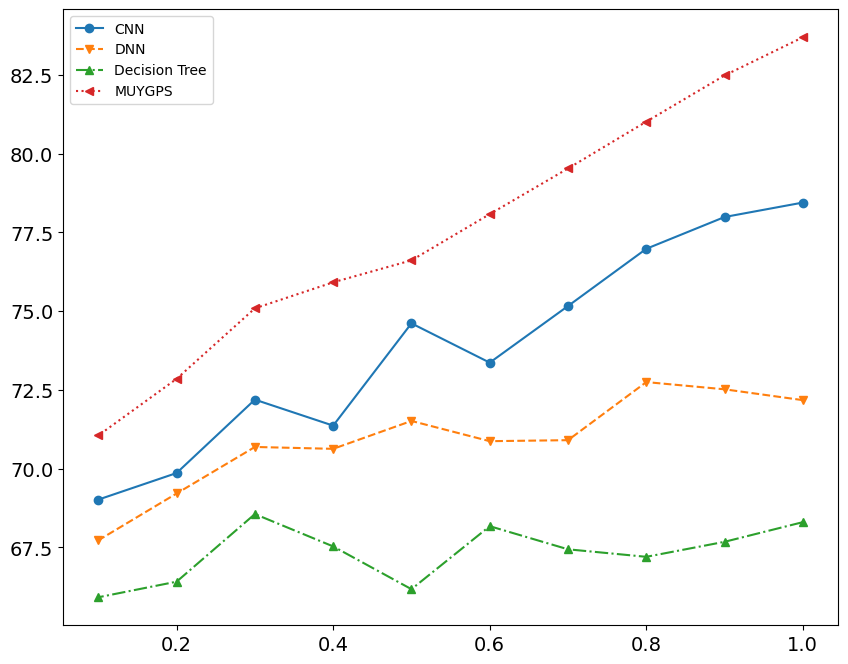

In [7]:
# list plt markers
markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', 'D', 'd']
# list plt line styles
line_styles = ['-', '--', '-.', ':']

train_sizes = [1.0,0.9, 0.8,0.7, 0.6,0.5, 0.4, 0.3, 0.2, 0.1]
# plot all test sizes results
plt.figure(figsize=(10, 8))
plt.plot(train_sizes, cnn_test_size.values[::-1].reshape(-1), marker=markers[0], label='CNN', linestyle=line_styles[0])
plt.plot(train_sizes, dnn_test_size, marker=markers[1], label='DNN', linestyle=line_styles[1])
plt.plot(train_sizes, dt_test_size.values.reshape(-1), marker=markers[2], label='Decision Tree', linestyle=line_styles[2])
plt.plot(train_sizes, muygps_test_size.values.reshape(-1), marker=markers[3], label='MUYGPS', linestyle=line_styles[3])
plt.legend()
plt.show()